f(0.252) = 0.7772497905256229
f(0.457) = 0.6331470668976075


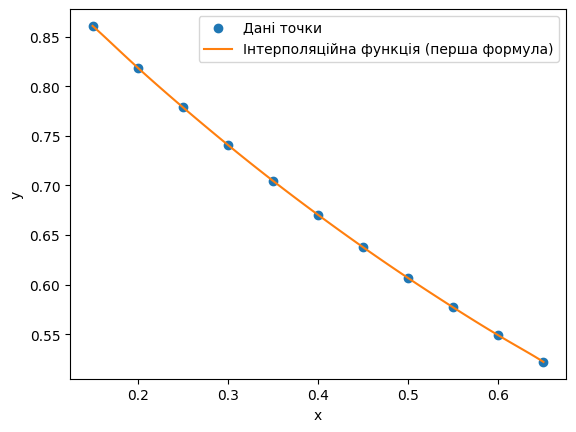

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Задані точки
x = np.array([0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65])
y = np.array([0.8607, 0.8187, 0.7788, 0.7408, 0.7046, 0.6703, 0.6376, 0.6065, 0.5769, 0.5488, 0.5220])

# Перша інтерполяційна формула
def first_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x[i + j] - x[i])
    ans = 0
    for j in range(n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
    return ans

# Друга інтерполяційна формула
def second_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x[i + j] - x[i])
    ans = f[0, 0]
    for j in range(1, n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
    return ans

# Обчислюємо значення функції в точках x = 0.1 та x = 0.9
x1 = 0.252
x2 = 0.457
y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)

print(f"f({x1}) = {y1}")
print(f"f({x2}) = {y2}")

# Побудова графіка інтерполяції
x_values = np.linspace(min(x), max(x), 100)
y_values = [first_interpolation(x, y, xi) for xi in x_values]

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(x_values, y_values, label='Інтерполяційна функція (перша формула)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()